# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we visualize four activation maps in a CNN layer.


### 1. Import the Image

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


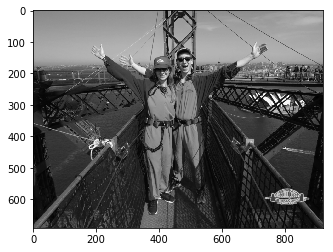

In [2]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'images/JonNikkiBridge.jpg'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# resize to smaller
small_img = scipy.misc.imresize(gray_img, 0.3)

# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

# plot image
plt.imshow(small_img, cmap='gray')
plt.show()

### 2. Specify the Filters

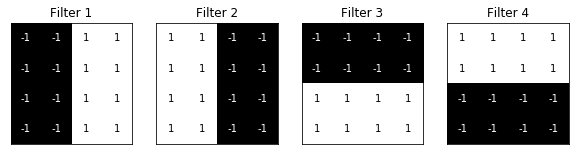

In [19]:
import numpy as np

# This basic filter is looking to spot vertical and horizontal boundaries. You can see the result below.
# This doesn't work well when there are diagonal boundaries like in my picture. 
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

# Instead, I created a diagonal boundary array here
# filter_vals = np.array([[1, -1, -1, -1], [-1, 1, -1, -1], [-1, -1, 1, -1], [-1, -1, -1, 1]])

### do not modify the code below this line ###

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

# visualize all filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### 3. Visualize the Activation Maps for Each Filter

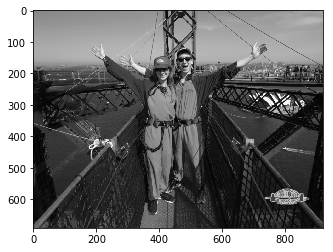

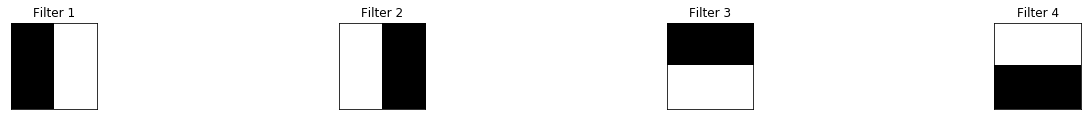

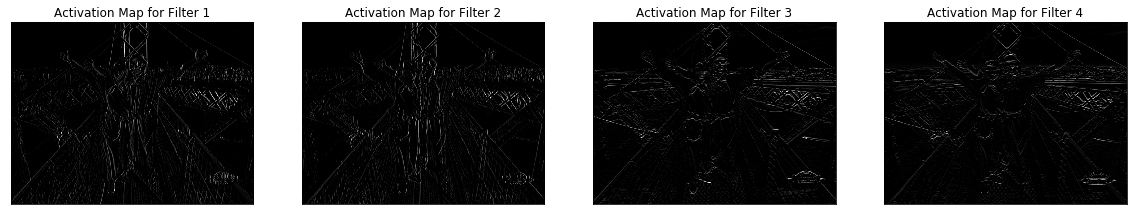

In [20]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

# plot image
plt.imshow(small_img, cmap='gray')

# define a neural network with a single convolutional layer with one filter
model = Sequential()
model.add(Convolution2D(1, (4, 4), activation='relu', input_shape=(small_img.shape[0], small_img.shape[1], 1)))

# apply convolutional filter and return output
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    model.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(model.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

# visualize all activation maps
fig = plt.figure(figsize=(20, 20))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    apply_filter(small_img, i, filters, ax)
    ax.set_title('Activation Map for Filter %s' % str(i+1))